# **Um projeto de baixa dimensionalidade e o baseline**

Treinaremos com 1617
Testaremos com 540
A acurácia foi de 60.56%

A acurácia do modelo de base foi de 52.59%
x_min: 1.0
x_max: 100.0
y_min: 102.0
y_max: 30223.0

 [[1.000000e+00 1.020000e+02]
 [1.990000e+00 1.020000e+02]
 [2.980000e+00 1.020000e+02]
 ...
 [9.703000e+01 2.992179e+04]
 [9.802000e+01 2.992179e+04]
 [9.901000e+01 2.992179e+04]]

 [[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


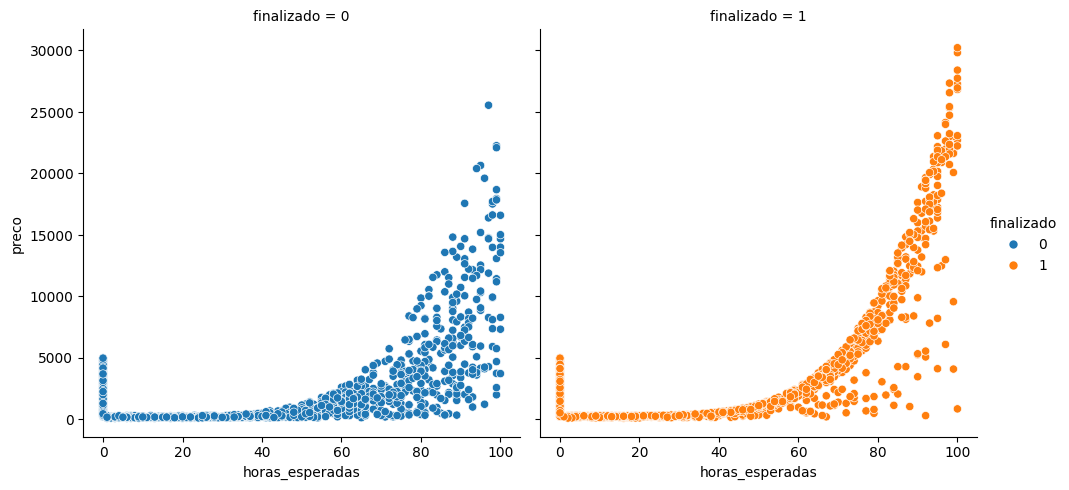

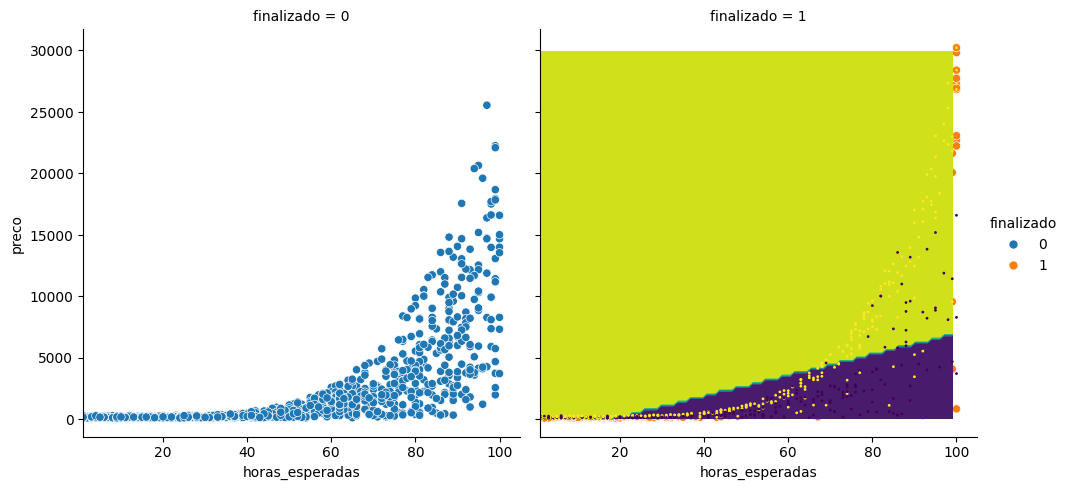

In [ ]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score


SEED = 20

pixels = 100

modelo = LinearSVC()
uri ="https://gist.githubusercontent.com/guilhermesilveira/12291c548acaf544596795709020e3db/raw/325bdef098bd9cbc2189215b7e32e22f437f29f3/projetos.csv"
dados = pd.read_csv(uri)

dados["finalizado"] = dados["nao_finalizado"].map({1:0, 0:1})
dados.head(10)

#sns.scatterplot(x="horas_esperadas", y="preco", data=dados, hue="finalizado")
sns.relplot(x="horas_esperadas", y="preco", data=dados, hue="finalizado", col="finalizado")


dados = dados.query("horas_esperadas > 0")
sns.relplot(x="horas_esperadas", y="preco", data=dados, hue="finalizado", col="finalizado")

x = dados[["horas_esperadas", "preco"]]
y = dados["finalizado"]

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED,
                                                         stratify = y)
print(f"Treinaremos com {len(treino_x)}")
print(f"Testaremos com {len(teste_x)}")

modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%\n")

previsoes_de_base = teste_y.sum() / len(teste_y) * 100
print(f"A acurácia do modelo de base foi de {previsoes_de_base:.2f}%")

x_min = teste_x["horas_esperadas"].min()
x_max = teste_x["horas_esperadas"].max()
y_min = teste_x["preco"].min()
y_max = teste_x["preco"].max()
print(f"x_min: {x_min}")
print(f"x_max: {x_max}")
print(f"y_min: {y_min}")
print(f"y_max: {y_max}")

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
print("\n",pontos)

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
print("\n", Z)


plt.contourf(xx, yy, Z)
plt.scatter(teste_x["horas_esperadas"], teste_x["preco"], c=teste_y, s=1)

# **Temas relacionados para estudos futuros**
---


*   Como construir um mapa de decisão em ML;
*   Como funciona a avaliação de um modelo contra um baseline;
*   O que é FacetGrid ?;
*   O que é um baseline em Machine Learning?;
*   O que é baixa dimensionalidade em Machine Learning;
*   O que é linearidade e não linearidade?
*   Relações não-lineares, o que são?;
*   Diferença de LinearSVC para SVC;
*   O que são SVMs?;
*   O que seria curva de decisão?;
*   Como se dá a integração de um modelo de Machine Learning à um aplicativo;
*   O que é Support Vector Machine?
*   O que é normalização em ciência de dados?
*   Como usar o pré-processador de dados com StandardScaler()?
* Dummy Classifiers





